# SPH6004_assignment1_TXT

## 0. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from genetic_selection import GeneticSelectionCV
from sklearn.model_selection import train_test_split

## 1. Load Data and Brief  Analysis

In [2]:
df = pd.read_csv('./Assignment_1_data.csv')
df

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_indirect_min,urineoutput,sofa_respiration,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
0,M,54.550390,93.0,115.0,103.500000,57.0,100.0,82.733333,87.0,163.0,...,NaN,3459.0,2.0,0.0,NaN,1.0,0.0,1.0,3,False
1,M,86.324653,50.0,61.0,54.333333,61.0,93.0,71.695652,95.0,141.0,...,NaN,2020.0,NaN,1.0,NaN,1.0,1.0,1.0,8,False
2,M,40.270146,70.0,105.0,83.434783,66.0,92.0,76.695652,94.0,129.0,...,NaN,3050.0,NaN,1.0,0.0,1.0,1.0,0.0,4,False
3,M,73.383547,68.0,98.0,83.880000,74.0,101.0,84.694444,83.0,148.0,...,NaN,1592.0,NaN,0.0,NaN,0.0,0.0,1.0,6,False
4,M,70.724748,77.0,95.0,85.771429,30.0,90.0,62.657143,52.0,129.0,...,NaN,339.0,2.0,0.0,0.0,4.0,1.0,3.0,10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484,F,84.952721,59.0,80.0,68.538462,2.0,95.0,74.346154,109.0,152.0,...,NaN,697.0,NaN,0.0,0.0,1.0,4.0,1.0,10,False
36485,F,30.583263,59.0,104.0,79.954545,67.0,91.0,77.820000,94.0,140.0,...,NaN,2000.0,NaN,0.0,NaN,1.0,1.0,0.0,0,False
36486,F,60.095765,71.0,94.0,82.625000,51.0,92.0,61.772727,90.0,120.0,...,NaN,3500.0,NaN,0.0,NaN,1.0,0.0,0.0,3,False
36487,M,78.847051,63.0,86.0,72.836735,113.0,121.0,117.000000,148.0,219.0,...,NaN,1900.0,NaN,0.0,NaN,0.0,1.0,0.0,5,False


To convert a csv file into a dataframe for processing with pandas, we first need to figure out the amount of missing values in each columns,and consider how to handle the missing values in the table underlying the missing distribution.

In [3]:
#df.info()

In [4]:
df.describe()

,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,sbp_mean,...,bilirubin_indirect_max,bilirubin_indirect_min,urineoutput,sofa_respiration,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index
count,36489.000000,36417.000000,36417.000000,36417.000000,36401.000000,36401.000000,36401.000000,36343.000000,36343.000000,36343.000000,...,1544.000000,1544.000000,35073.000000,7587.000000,36235.000000,18590.000000,36402.000000,36468.000000,36467.000000,36489.000000
mean,65.907162,70.935003,103.109572,84.855578,60.429777,105.484634,79.255689,94.449898,147.691412,119.757827,...,1.855894,1.742163,1914.991284,1.723738,0.481109,0.514094,1.060381,0.915433,0.826501,5.798104
std,16.797498,15.064109,20.682937,15.977454,13.347348,23.346984,11.758700,16.705217,22.855348,17.220898,...,2.293747,2.219434,1266.887914,0.588464,0.825034,0.963752,0.972511,1.050761,1.201510,3.014789
min,18.002527,9.000000,36.000000,28.500000,0.830000,51.000000,42.513889,2.000000,49.000000,40.000000,...,0.100000,0.100000,-14850.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.549252,60.000000,88.000000,73.321429,53.000000,91.000000,70.896552,83.500000,132.000000,107.096464,...,0.500000,0.500000,1050.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000
50%,67.439033,70.000000,101.000000,83.500000,60.000000,102.000000,77.851852,93.000000,146.000000,117.678571,...,1.000000,1.000000,1667.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000
75%,78.729524,80.000000,115.000000,95.250000,68.000000,115.000000,86.382353,104.000000,161.000000,130.649616,...,2.200000,2.000000,2500.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000
max,102.865603,163.000000,295.000000,174.740741,133.000000,299.000000,151.529412,184.000000,352.000000,206.388889,...,21.200000,21.200000,31016.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,20.000000


### 1.1 check NaN Values

Columns with more than 100 missing values: 47
Columns with more than 500 missing values: 29
Columns with more than 5000 missing values: 26
Columns with more than 15000 missing values: 26
Columns with more than 20000 missing values: 15
Columns with more than 30000 missing values: 8
Columns with more than 50% missing rate: 15
Columns with more than 60% missing rate: 13
Columns with more than 70% missing rate: 13
Columns with more than 80% missing rate: 10
Columns with more than 90% missing rate: 6


Text(0.5, 0, '% missing')

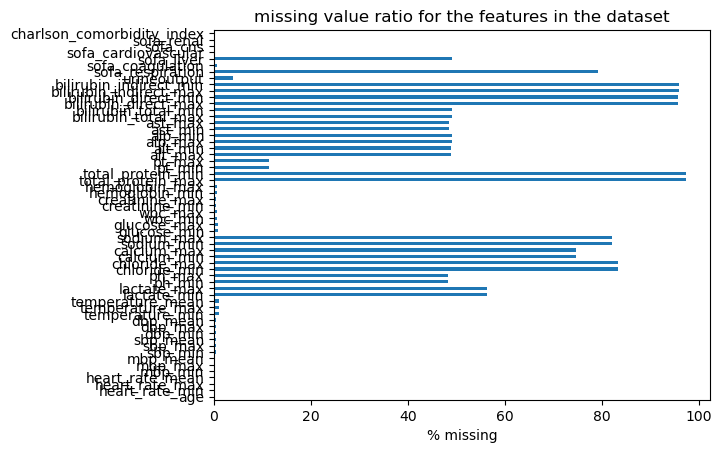

In [5]:
NaN_counts = df.isna().sum()
print(f"Columns with more than 100 missing values: {sum(NaN_counts > 100)}")
print(f"Columns with more than 500 missing values: {sum(NaN_counts > 500)}")
print(f"Columns with more than 5000 missing values: {sum(NaN_counts > 5000)}")
print(f"Columns with more than 15000 missing values: {sum(NaN_counts > 15000)}")
print(f"Columns with more than 20000 missing values: {sum(NaN_counts > 20000)}")
print(f"Columns with more than 30000 missing values: {sum(NaN_counts > 30000)}")
empty_percentages = df.isna().sum() / len(df) * 100
print(f"Columns with more than 50% missing rate: {sum(empty_percentages > 50)}")
print(f"Columns with more than 60% missing rate: {sum(empty_percentages > 60)}")
print(f"Columns with more than 70% missing rate: {sum(empty_percentages > 70)}")
print(f"Columns with more than 80% missing rate: {sum(empty_percentages > 80)}")
print(f"Columns with more than 90% missing rate: {sum(empty_percentages > 90)}")
#df.isnull().sum() / len(df) * 100
ax = empty_percentages[1:-1].plot.barh(title='missing value ratio for the features in the dataset')
ax.set_xlabel("% missing")

most of the columns missed more than 100 values, from 500 to 15000 missing values, the amount keeps stable at half of columns, then significantly changed to less than 15 when missing amount greater than 20000.
In a word, there are approximately 15 features' missing rate greater than 50% ,approximately 11 features' missing rate greater than 70% approximately 8 features' missing rate greater than 80%.

Since the difference in the number of features between 50% and 80% of the missing rate is small, you can try to remove the features between 50% and 70% to compare the difference, and if a few features greater than 50% are not critical, it can be removed.

### 1.2 show scatter chart

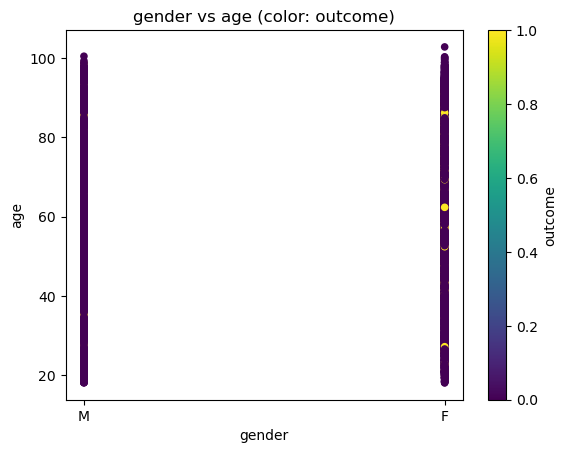

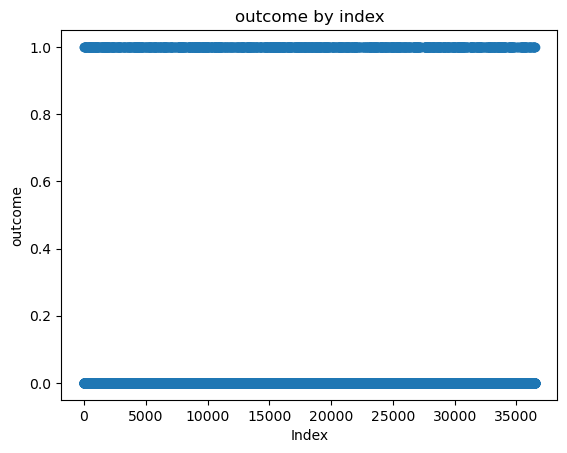

In [6]:
df['outcome'] = df['outcome'].astype(int)  # set the bool value (true or false) to 0/1

# 设置x、y和z特征名称
x_feature = "gender"
y_feature = "age"
z_feature = "outcome"
# 绘制点图
fig, ax = plt.subplots()
df.plot.scatter(x=x_feature, y=y_feature, c=z_feature, cmap='viridis', ax=ax)
# 设置图形标题和坐标轴标签
ax.set_title(f"{x_feature} vs {y_feature} (color: {z_feature})")
ax.set_xlabel(x_feature)
ax.set_ylabel(y_feature)
# 显示图形
plt.show()

# 设置绘图参数
feature = 'outcome'
x = df.index.values
y = df[feature].values
# 绘制散点图
plt.scatter(x, y)
plt.title(f'{feature} by index')
plt.xlabel('Index')
plt.ylabel(feature)
# 显示图形
plt.show()

## 2. Data Pre-processing

### 2.1 Number convert and Set NaN Filter

In [7]:
# apart from "outcome" , "gender" also should be Convert to digital number,0 for'F',1 for 'M'
df['gender'] = df['gender'].replace(['F', 'M'], [0, 1])

# set a filter to select feature more than a set missing rate,get Flitered data.
F_df = df.loc[:, empty_percentages < 60]
F_df

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_total_max,bilirubin_total_min,urineoutput,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
0,1,54.550390,93.0,115.0,103.500000,57.0,100.0,82.733333,87.0,163.0,...,NaN,NaN,3459.0,0.0,NaN,1.0,0.0,1.0,3,0
1,1,86.324653,50.0,61.0,54.333333,61.0,93.0,71.695652,95.0,141.0,...,NaN,NaN,2020.0,1.0,NaN,1.0,1.0,1.0,8,0
2,1,40.270146,70.0,105.0,83.434783,66.0,92.0,76.695652,94.0,129.0,...,1.1,1.1,3050.0,1.0,0.0,1.0,1.0,0.0,4,0
3,1,73.383547,68.0,98.0,83.880000,74.0,101.0,84.694444,83.0,148.0,...,NaN,NaN,1592.0,0.0,NaN,0.0,0.0,1.0,6,0
4,1,70.724748,77.0,95.0,85.771429,30.0,90.0,62.657143,52.0,129.0,...,0.9,0.8,339.0,0.0,0.0,4.0,1.0,3.0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484,0,84.952721,59.0,80.0,68.538462,2.0,95.0,74.346154,109.0,152.0,...,0.6,0.5,697.0,0.0,0.0,1.0,4.0,1.0,10,0
36485,0,30.583263,59.0,104.0,79.954545,67.0,91.0,77.820000,94.0,140.0,...,NaN,NaN,2000.0,0.0,NaN,1.0,1.0,0.0,0,0
36486,0,60.095765,71.0,94.0,82.625000,51.0,92.0,61.772727,90.0,120.0,...,NaN,NaN,3500.0,0.0,NaN,1.0,0.0,0.0,3,0
36487,1,78.847051,63.0,86.0,72.836735,113.0,121.0,117.000000,148.0,219.0,...,NaN,NaN,1900.0,0.0,NaN,0.0,1.0,0.0,5,0


### 2.2 Data imputation

In [8]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
from sklearn.impute import SimpleImputer
#Instantiate an Imputer
imputer = SimpleImputer(strategy='median')
# Use Fit() to Calculate the magnitude of the correlation value of the X matrix
imputer.fit(F_df)
# Transform the data by replacing missing values with the mean value of the corresponding column
F_df = pd.DataFrame(imputer.transform(F_df),columns = F_df.columns)

F_df.to_csv('Assignment_1_puredata.csv', index=False)
F_df

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_total_max,bilirubin_total_min,urineoutput,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
0,1.0,54.550390,93.0,115.0,103.500000,57.0,100.0,82.733333,87.0,163.0,...,0.6,0.6,3459.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0
1,1.0,86.324653,50.0,61.0,54.333333,61.0,93.0,71.695652,95.0,141.0,...,0.6,0.6,2020.0,1.0,0.0,1.0,1.0,1.0,8.0,0.0
2,1.0,40.270146,70.0,105.0,83.434783,66.0,92.0,76.695652,94.0,129.0,...,1.1,1.1,3050.0,1.0,0.0,1.0,1.0,0.0,4.0,0.0
3,1.0,73.383547,68.0,98.0,83.880000,74.0,101.0,84.694444,83.0,148.0,...,0.6,0.6,1592.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0
4,1.0,70.724748,77.0,95.0,85.771429,30.0,90.0,62.657143,52.0,129.0,...,0.9,0.8,339.0,0.0,0.0,4.0,1.0,3.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484,0.0,84.952721,59.0,80.0,68.538462,2.0,95.0,74.346154,109.0,152.0,...,0.6,0.5,697.0,0.0,0.0,1.0,4.0,1.0,10.0,0.0
36485,0.0,30.583263,59.0,104.0,79.954545,67.0,91.0,77.820000,94.0,140.0,...,0.6,0.6,2000.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
36486,0.0,60.095765,71.0,94.0,82.625000,51.0,92.0,61.772727,90.0,120.0,...,0.6,0.6,3500.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0
36487,1.0,78.847051,63.0,86.0,72.836735,113.0,121.0,117.000000,148.0,219.0,...,0.6,0.6,1900.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0


 #### multicollinear features 

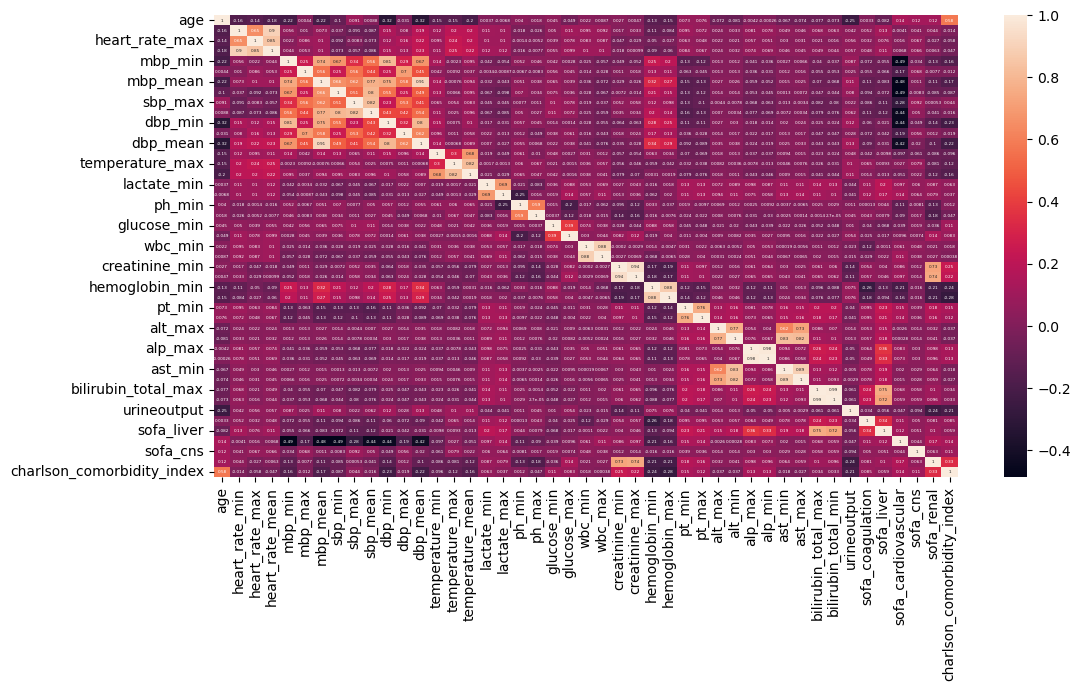

In [9]:
P_df = pd.read_csv('./Assignment_1_puredata.csv')
y = P_df.iloc[:, -1].values  #取最后一列，即输出
# calculate pearson correlation between features
var_cor = P_df.iloc[:, 1:-1].corr()
plt.figure(figsize=[12, 6])
sns.heatmap(var_cor, annot=True, annot_kws={"fontsize":3})
plt.show()

This heat map shows data with a high degree of covariance, to handle multicollinear features ,Consider using regularization methods such as ridge regression or Lasso regression    

### Visualization

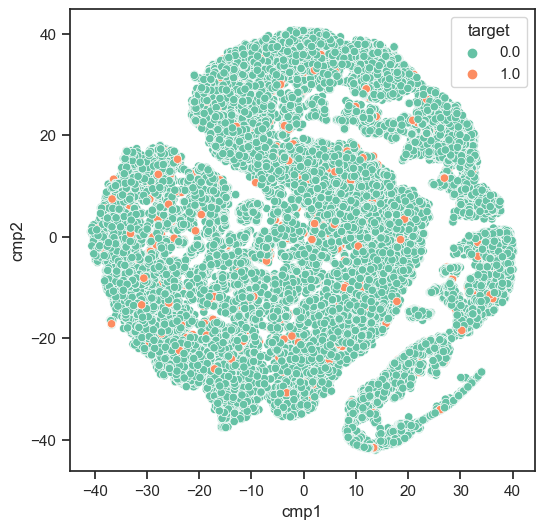

In [10]:
from sklearn import preprocessing
#X_norm = preprocessing.scale(P_df)
from sklearn.decomposition import PCA
#pca = PCA(n_components='mle')
#X_PCA = pca.fit_transform(X_norm)
#X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.2, random_state=0)
# visulization
from MulticoreTSNE import MulticoreTSNE as TSNE
import seaborn as sns; sns.set()
tsne = TSNE(n_jobs=4)
X_tsne = tsne.fit_transform(P_df)
data_frame_rd = pd.DataFrame(data=X_tsne,columns=['cmp1','cmp2'])
data_frame_rd['target'] = y
fig = plt.figure(figsize=(6,6))
sns.set_context("paper")
sns.set(font_scale=1)
sns.set_style("ticks")
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="cmp1", y="cmp2", data=data_frame_rd,hue="target",
                     hue_norm=(0, 1),
                     palette="Set2",legend='brief')

From the figure, we can see that the output of the data set has a large imbalance problem.Flase(0)Output Significantly more than True(1)output.Consider using OverSampling

### 2.4 Dataset split

In [11]:
from sklearn.model_selection import train_test_split
# input and output
x = P_df.iloc[:,:-1]
y = P_df.iloc[:,-1]
# Split dataset into training and testing set after feature selection
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(29191, 46)
(29191,)
(7298, 46)
(7298,)


### 2.5 Standardization/Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

# 假设 X_train 是训练集特征，X_test 是测试集特征
# 先实例化一个StandardScaler对象
# scaler = StandardScaler()
# 
# # 对训练集特征进行标准化
# X_train_scaled = scaler.fit_transform(X_train)
# 
# # 对测试集特征进行标准化
# X_test_scaled = scaler.transform(X_test)

In [13]:
# X_train_scaleddf = pd.DataFrame(X_train_scaled,columns = X_train.columns)
# X_train_scaleddf

In [14]:
# X_test_scaleddf = pd.DataFrame(X_test_scaled,columns = X_test.columns)
# X_test_scaleddf

### 2.6 Oversampling/SMOTE

In [15]:
from imblearn.over_sampling import SMOTE

# X和y分别为训练集的特征和标签
smote = SMOTE(random_state=42) # 初始化SMOTE对象
X_resampled, y_resampled = smote.fit_resample(X_train, y_train) # 进行过采样

In [16]:
print(X_resampled.shape)
print(y_resampled.shape)

(56262, 46)
(56262,)


## 3.Feature Selection

### 3.1 GeneticSelection algrithom

without Standardization

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#rfc = RandomForestClassifier(n_estimators=100)
lrc_l1 = LogisticRegression(penalty='l1', solver='saga')
selector = GeneticSelectionCV(estimator= lrc_l1,
                              cv=5,
                              verbose=1,
                              scoring="f1",
                              max_features=30,
                              n_population=50,
                              crossover_proba=0.5,
                              mutation_proba=0.2,
                              n_generations=50,
                              crossover_independent_proba=0.5,
                              mutation_independent_proba=0.05,
                              tournament_size=3,
                              caching=True,
                              n_jobs=-1)
# Select the best features using the genetic algorithm
selector = selector.fit(X_resampled,y_resampled)

# Select the features in the original dataset
selected_features = X_resampled.columns[selector.support_]
print("Selected features: ",selected_features)

Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	50    	[  0.541324  15.74       0.008513]	[ 0.093383  9.120987  0.011811]	[ 0.148567  1.        0.001979]	[  0.711186  29.         0.082315]
1  	28    	[  0.596218  19.08       0.006683]	[ 0.055475  7.407672  0.00567 ]	[ 0.450092  2.        0.001979]	[  0.711186  29.         0.038109]
2  	28    	[  0.625502  17.92       0.005623]	[ 0.071163  5.972738  0.002538]	[ 0.357751  9.        0.001337]	[  0.711186  29.         0.019858]
3  	27    	[  0.676229  14.72       0.005078]	[ 0.048264  5.146028  0.001104]	[ 0.545829  8.        0.003176]	[  0.712301  27.         0.008344]
4  	27    	[  0.702954  11.5        0.00474 ]	[ 0.025543  3.074085  0.000755]	[ 0.566031  9.        0.002199]	[  0.715917  21.         0.006517]
5  	29    	[  0.706223  11.94       0.004661]	[ 0.027259  2.914858  0.00059 ]	[ 0.52187

D:\Tcode9\NUS\IT5006\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [18]:
print(len(selected_features))

21


LASSOround1
Trial1:  Selected features:  Index(['sbp_min', 'dbp_mean', 'glucose_min', 'alt_max', 'alt_min', 'alp_max',
       'ast_max'],
      dtype='object')
LASSOTrial2:  Selected features:  Index(['mbp_min', 'wbc_max', 'bilirubin_total_max', 'sofa_cns', 'sofa_renal',
       'charlson_comorbidity_index'],
      dtype='object')

round 2
LASSOTrial1: Selected features:  Index(['heart_rate_mean', 'sbp_min', 'sbp_max', 'sbp_mean', 'dbp_max',
       'dbp_mean', 'temperature_min', 'wbc_min', 'hemoglobin_max', 'pt_min',
       'pt_max', 'ast_max', 'urineoutput', 'sofa_cns',
       'charlson_comorbidity_index'],
      dtype='object')

LASSORound3
Selected features:  Index(['heart_rate_mean', 'mbp_max', 'sbp_min', 'sbp_max', 'sbp_mean',
       'dbp_max', 'temperature_min', 'temperature_mean', 'lactate_min',
       'lactate_max', 'ph_max', 'glucose_min', 'glucose_max', 'wbc_min',
       'creatinine_max', 'hemoglobin_min', 'pt_min', 'pt_max', 'alt_max',
       'bilirubin_total_max', 'bilirubin_total_min', 'urineoutput',
       'sofa_coagulation', 'sofa_cns', 'sofa_renal',
       'charlson_comorbidity_index'],
      dtype='object')

LASSOround4
Selected features:  Index(['heart_rate_mean', 'mbp_min', 'mbp_max', 'mbp_mean', 'sbp_max',
       'dbp_min', 'dbp_max', 'dbp_mean', 'temperature_min', 'temperature_max',
       'temperature_mean', 'lactate_min', 'lactate_max', 'ph_max',
       'glucose_min', 'wbc_min', 'hemoglobin_min', 'hemoglobin_max', 'pt_max',
       'alt_min', 'alp_max', 'alp_min', 'ast_min', 'ast_max',
       'bilirubin_total_min', 'urineoutput', 'sofa_coagulation', 'sofa_cns',
       'sofa_renal', 'charlson_comorbidity_index'],
      dtype='object')

round5 RF
Selected features:  Index(['gender', 'age', 'heart_rate_min', 'heart_rate_max', 'heart_rate_mean',
       'mbp_min', 'mbp_max', 'mbp_mean', 'sbp_min', 'sbp_max', 'dbp_min',
       'dbp_max', 'dbp_mean', 'temperature_min', 'temperature_max',
       'temperature_mean', 'lactate_max', 'ph_min', 'ph_max', 'glucose_min',
       'glucose_max', 'wbc_min', 'wbc_max', 'creatinine_min', 'hemoglobin_min',
       'hemoglobin_max', 'pt_max', 'alp_max', 'urineoutput',
       'sofa_coagulation', 'sofa_liver', 'sofa_cardiovascular', 'sofa_renal',
       'charlson_comorbidity_index'],
      dtype='object')

feature with 、Ridge （L2）

### 3.2 Selected Feature

In [19]:
selected_df = X_resampled[selected_features]
selected_df

,gender,heart_rate_min,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,dbp_min,dbp_max,temperature_max,...,glucose_min,wbc_min,wbc_max,hemoglobin_min,pt_min,pt_max,bilirubin_total_max,sofa_coagulation,sofa_cns,charlson_comorbidity_index
0,0.000000,47.000000,43.000000,97.000000,65.441176,61.000000,155.000000,24.000000,80.000000,37.800000,...,175.000000,12.800000,16.000000,10.800000,13.800000,14.200000,0.500000,0.000000,1.000000,9.000000
1,1.000000,68.000000,58.000000,101.000000,72.280000,90.000000,147.000000,37.000000,89.000000,37.170000,...,136.000000,7.900000,10.300000,11.100000,12.400000,13.100000,0.600000,0.000000,1.000000,8.000000
2,0.000000,69.000000,61.000000,112.000000,76.600000,90.000000,132.000000,44.000000,104.000000,37.500000,...,126.000000,17.200000,17.200000,11.000000,11.900000,11.900000,0.600000,0.000000,0.000000,6.000000
3,0.000000,89.000000,61.000000,104.000000,83.840000,90.000000,147.000000,48.000000,91.000000,37.170000,...,159.000000,4.700000,5.000000,10.000000,11.800000,11.800000,0.600000,1.000000,0.000000,6.000000
4,1.000000,49.000000,69.000000,101.000000,84.827586,111.000000,152.000000,57.000000,89.000000,37.280000,...,79.000000,4.400000,4.400000,12.700000,13.400000,14.000000,0.400000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56257,0.723814,74.523724,57.371531,90.685766,70.485165,104.152642,170.057297,41.028649,77.476276,38.303044,...,290.095345,8.847628,8.875246,10.971441,13.431423,14.148568,0.959042,0.000000,0.828559,5.000000
56258,0.120253,93.924051,44.882911,96.924051,81.033449,25.613924,154.639240,19.968355,78.727848,36.986772,...,67.772152,4.492405,9.092405,7.524684,21.991139,69.658860,27.074684,3.000000,3.879747,1.360760
56259,1.000000,80.438594,60.679824,130.098682,87.327868,85.359648,198.487935,47.689692,96.428726,37.353695,...,127.921055,11.108881,12.726097,10.886732,13.892105,14.659101,0.566996,0.000000,1.669956,4.330044
56260,0.017037,72.693336,72.914815,124.642225,97.550557,103.880742,164.625188,59.931852,114.591114,37.275230,...,104.914815,7.066444,7.066444,9.817037,12.305111,12.305111,0.594889,1.965926,3.000000,2.965926


### Visualization

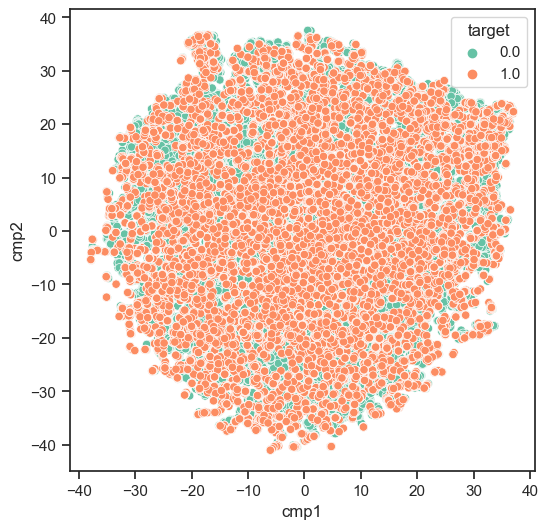

In [20]:
#X_norm = preprocessing.scale(selected_df)
#pca = PCA(n_components='mle')
#X_PCA = pca.fit_transform(X_norm)
#X_train, X_test, y_train, y_test = train_test_split(X_PCA, y_resampled, test_size=0.2, random_state=0)

# visulization
tsne = TSNE(n_jobs=4)
X_tsne = tsne.fit_transform(selected_df)
data_frame_rd = pd.DataFrame(data=X_tsne,columns=['cmp1','cmp2'])
data_frame_rd['target'] = y_resampled
fig = plt.figure(figsize=(6,6))
sns.set_context("paper")
sns.set(font_scale=1)
sns.set_style("ticks")
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="cmp1", y="cmp2", data=data_frame_rd,hue="target",
                     hue_norm=(0, 1),
                     palette="Set2",legend='brief')

## 4.Models

### 4.1 LogisticRegression

In [21]:
X_test_S = X_test[selected_features]
X_test_S

,gender,heart_rate_min,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,dbp_min,dbp_max,temperature_max,...,glucose_min,wbc_min,wbc_max,hemoglobin_min,pt_min,pt_max,bilirubin_total_max,sofa_coagulation,sofa_cns,charlson_comorbidity_index
22866,1.0,58.0,94.0,120.0,103.125000,149.0,184.0,75.0,107.0,37.28,...,109.0,10.4,11.5,8.9,11.7,16.6,0.4,0.0,0.0,6.0
28981,0.0,72.0,56.0,87.0,71.125000,97.0,132.0,43.0,79.0,36.94,...,145.0,8.0,9.4,13.1,11.7,13.3,4.7,1.0,0.0,4.0
16232,1.0,74.0,45.0,86.0,63.360000,82.0,126.0,34.0,80.0,36.94,...,117.0,13.7,20.6,7.4,20.7,20.7,4.1,0.0,4.0,9.0
2004,1.0,113.0,83.0,107.0,94.040000,98.0,146.0,72.0,95.0,37.11,...,112.0,7.9,9.8,7.9,16.5,17.5,10.4,0.0,2.0,7.0
3380,0.0,53.0,50.0,76.0,60.120000,76.0,127.0,32.0,63.0,37.11,...,96.0,10.9,13.2,7.8,14.0,14.3,0.6,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16095,0.0,62.0,56.0,97.0,76.875000,81.0,146.0,48.0,91.0,37.72,...,84.0,4.1,4.8,13.2,15.7,29.7,0.6,1.0,2.0,6.0
1903,1.0,70.0,72.0,101.0,88.000000,121.0,164.0,57.0,86.0,37.28,...,122.0,8.5,14.0,8.2,16.4,22.2,3.0,0.0,0.0,11.0
23807,0.0,56.0,51.0,101.0,73.739130,103.0,216.0,32.0,60.0,36.56,...,224.0,7.4,7.4,12.4,13.1,13.9,0.6,0.0,0.0,10.0
13802,1.0,61.0,60.0,156.0,103.954545,128.0,168.0,49.0,152.0,37.11,...,158.0,0.7,0.7,11.2,13.1,13.9,0.6,1.0,0.0,8.0


### Cross-validation and grid_search

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
params = {'C': [0.01, 0.1, 1, 10, 100]}
logreg = LogisticRegression(max_iter = 10000)
grid_search = GridSearchCV(logreg, params, cv=5)
grid_search.fit(selected_df, y_resampled)
scores = cross_val_score(logreg, selected_df, y_resampled, cv=5)

# Print the cross-validation scores
print('Cross-validation scores:', scores)
print('Mean cross-validation score:', scores.mean())

Cross-validation scores: [0.727095   0.73171599 0.73409172 0.73684678 0.73284749]
Mean cross-validation score: 0.7325193954677616


In [23]:
LR_model = LogisticRegression()
LR_model.fit(selected_df, y_resampled)

D:\Tcode9\NUS\IT5006\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### LR_Model Evaluation

**Accuracy** / **Confusion Matrix**  / **Precision** / **Recall** / **F1 Score** / **ROC Curve and AUC**

Model:LogisticRegression 
Accuracy:  0.7697999451904631
confusion_matrix:
 [[5450 1579]
 [ 101  168]]
precision: 0.09616485403548941
recall: 0.6245353159851301
F1_score: 0.16666666666666669
Classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.78      0.87      7029
         1.0       0.10      0.62      0.17       269

    accuracy                           0.77      7298
   macro avg       0.54      0.70      0.52      7298
weighted avg       0.95      0.77      0.84      7298



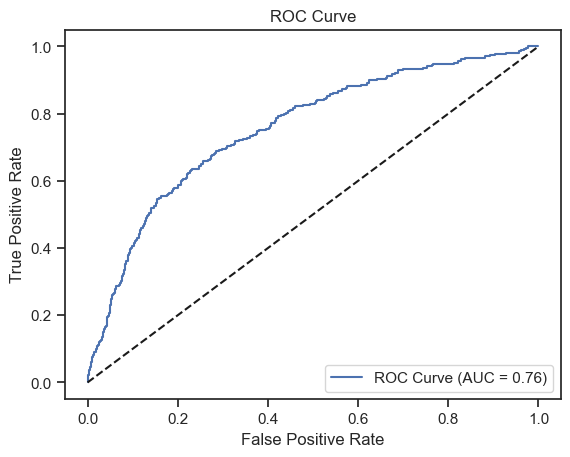

Text(0.5, 0, 'Predicted label')

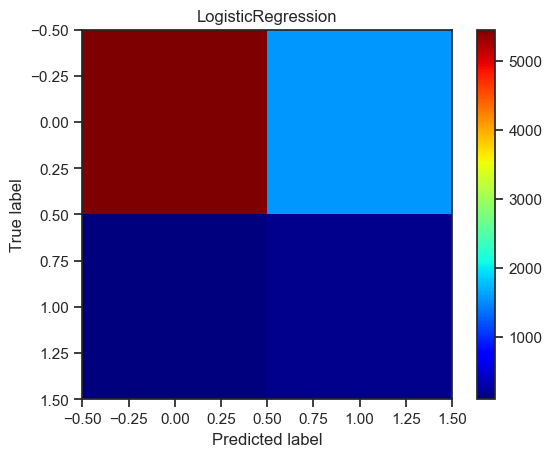

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve
#Accuracy
y_pred_lr = LR_model.predict(X_test_S)
accuracy_lr = LR_model.score(X_test_S, y_test)

# make predictions on the testing set and compute the confusion matrix
y_pred_lr = LR_model.predict(X_test_S)
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# make predictions on the testing set and compute the precision score
precision_lr = precision_score(y_test, y_pred_lr)

# make predictions on the testing set and compute the recall score
recall_lr = recall_score(y_test, y_pred_lr)

# make predictions on the testing set and compute the F1 score
f1_lr = f1_score(y_test, y_pred_lr)

print("Model:LogisticRegression ")
print("Accuracy: ",accuracy_lr)
print("confusion_matrix:\n",confusion_matrix_lr)
print("precision:",precision_lr)
print("recall:",recall_lr)
print("F1_score:",f1_lr)
print('Classification report:\n', classification_report(y_test, y_pred_lr))
# compute the predicted probabilities and the AUC
y_pred_prob = LR_model.predict_proba(X_test_S)[:, 1]
auc = roc_auc_score(y_test, y_pred_prob)
# plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
#confusion matrix jet
plt.imshow(confusion_matrix_lr,cmap=plt.cm.jet)
plt.colorbar()
plt.title("LogisticRegression")
plt.ylabel('True label')
plt.xlabel('Predicted label')

### 4.2 Decision Tree

In [25]:
DT_model = DecisionTreeClassifier(max_depth=5, criterion='entropy')
DT_model.fit(selected_df, y_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

Model:Decision Tree 
Accuracy:  0.9376541518224171
confusion_matrix:
 [[6804  225]
 [ 230   39]]
precision: 0.14772727272727273
recall: 0.1449814126394052
F1_score: 0.14634146341463414
Classification report:
               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      7029
         1.0       0.15      0.14      0.15       269

    accuracy                           0.94      7298
   macro avg       0.56      0.56      0.56      7298
weighted avg       0.94      0.94      0.94      7298



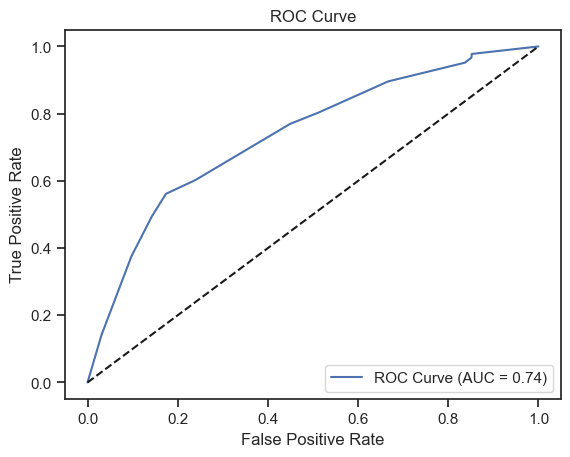

In [33]:
y_pred_DT = DT_model.predict(X_test_S)
accuracy_DT = DT_model.score(X_test_S, y_test)

y_pred_DT = DT_model.predict(X_test_S)
confusion_matrix_DT = confusion_matrix(y_test, y_pred_DT)

precision_DT = precision_score(y_test, y_pred_DT)

recall_DT = recall_score(y_test, y_pred_DT)

f1_DT = f1_score(y_test, y_pred_DT)

print("Model:Decision Tree ")
print("Accuracy: ",accuracy_DT)
print("confusion_matrix:\n",confusion_matrix_DT)
print("precision:",precision_DT)
print("recall:",recall_DT)
print("F1_score:",f1_DT)
print('Classification report:\n', classification_report(y_test, y_pred_DT))
# compute the predicted probabilities and the AUC
y_pred_prob = DT_model.predict_proba(X_test_S)[:, 1]
auc = roc_auc_score(y_test, y_pred_prob)
# plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
# #confusion matrix jet
# plt.imshow(confusion_matrix_lr,cmap=plt.cm.jet)
# plt.colorbar()
# plt.title("Decision Tree")
# plt.ylabel('True label')
# plt.xlabel('Predicted label')

### 4.3 RandomForest

In [27]:
RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(selected_df, y_resampled)

RandomForestClassifier()

Model:RandomForest¶ 
Accuracy:  0.9583447519868458
confusion_matrix:
 [[6985   44]
 [ 260    9]]
precision: 0.16981132075471697
recall: 0.03345724907063197
F1_score: 0.05590062111801242
Classification report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      7029
         1.0       0.17      0.03      0.06       269

    accuracy                           0.96      7298
   macro avg       0.57      0.51      0.52      7298
weighted avg       0.93      0.96      0.94      7298



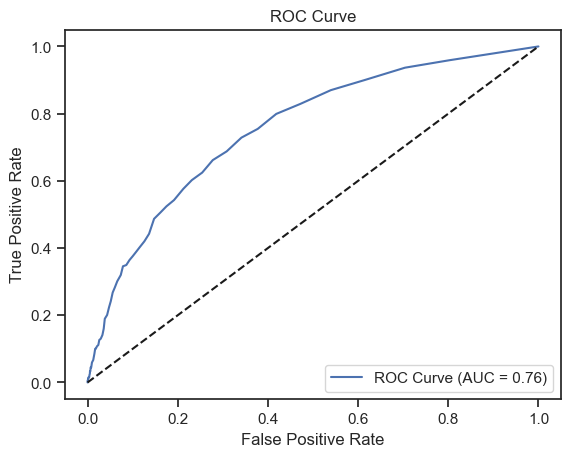

Text(0.5, 0, 'Predicted label')

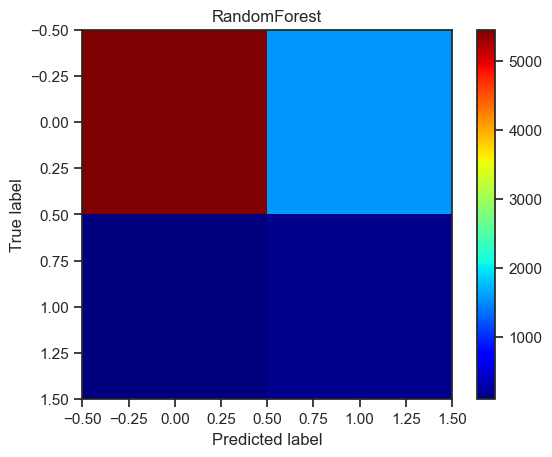

In [34]:
y_pred_RF = RF_model.predict(X_test_S)
accuracy_RF = RF_model.score(X_test_S, y_test)
y_pred_RF = RF_model.predict(X_test_S)
confusion_matrix_RF = confusion_matrix(y_test, y_pred_RF)
precision_RF = precision_score(y_test, y_pred_RF)
recall_RF = recall_score(y_test, y_pred_RF)
f1_RF = f1_score(y_test, y_pred_RF)
print("Model:RandomForest¶ ")
print("Accuracy: ",accuracy_RF)
print("confusion_matrix:\n",confusion_matrix_RF)
print("precision:",precision_RF)
print("recall:",recall_RF)
print("F1_score:",f1_RF)
print('Classification report:\n', classification_report(y_test, y_pred_RF))
y_pred_prob = RF_model.predict_proba(X_test_S)[:, 1]
auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
plt.imshow(confusion_matrix_lr,cmap=plt.cm.jet)
plt.colorbar()
plt.title("RandomForest")
plt.ylabel('True label')
plt.xlabel('Predicted label')

### SVM

In [31]:
SVM_model = SVC(kernel='linear')
SVM_model.fit(selected_df, y_resampled)

KeyboardInterrupt: 

### SVM_Model Evaluation

In [30]:
#Accuracy
y_predSVM = SVM_model.predict(X_test_S)
accuracySVM = SVM_model.score(X_test_S, y_test)
print("Accuracy: ",accuracySVM)

#混淆矩阵
from sklearn.metrics import confusion_matrix
# make predictions on the testing set and compute the confusion matrix
y_pred_SVM = SVM_model.predict(X_test_S)
confusion_matrix_SVM = confusion_matrix(y_test, y_pred_SVM)

#准确率
from sklearn.metrics import precision_score
# make predictions on the testing set and compute the precision score
precision_SVM = precision_score(y_test, y_pred_SVM)

#召回率
from sklearn.metrics import recall_score
# make predictions on the testing set and compute the recall score
recall_SVM = recall_score(y_test, y_pred_SVM)

from sklearn.metrics import f1_score
# make predictions on the testing set and compute the F1 score
f1_SVM = f1_score(y_test, y_pred_SVM)

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# compute the predicted probabilities and the AUC
y_pred_prob = SVM_model.predict_proba(X_test_S)[:, 1]
auc = roc_auc_score(y_test, y_pred_prob)

# plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("Accuracy: ",accuracy_SVM)
print("confusion_matrix:\n",confusion_matrix_SVM)
print("precision:",precision_SVM)
print("recall:",recall_SVM)
print("F1_score:",f1_SVM)

NameError: name 'SVM_model' is not defined

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)
#对测试集进行预测并计算准确率、精确率、召回率和F1分数等指标。

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = adaboost.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
#可以根据需要进行模型参数调整和优化，例如调整AdaBoost分类器的 n_estimators 参数、 learning_rate 参数等。

adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)